We need to import panda and read the csv file (accessible through the url).
after that we change the Index to the ID Column.
To get an overview and information of the data we call data.describe()

In [ ]:
import pandas as pd

data = pd.read_csv("https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/daw/-/raw/main/kc_house_data.csv")
data.index = data["id"]
data.drop(["id", "date"], axis=1, inplace=True)
data.describe()


We normalize all data and prints Boxplots to get more information

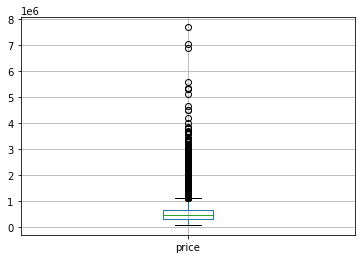

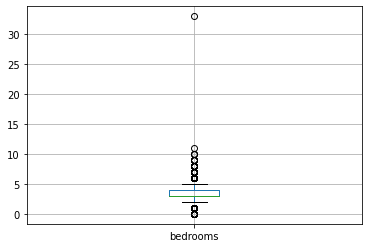

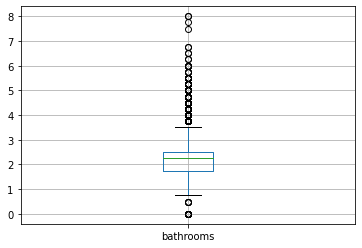

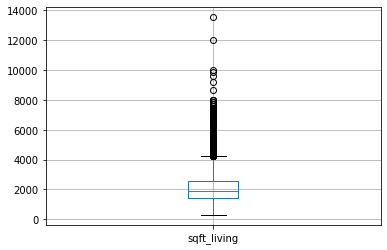

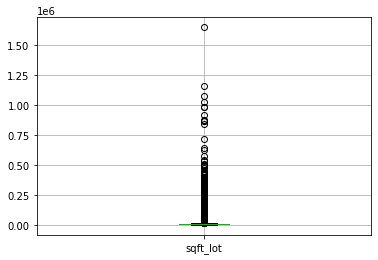

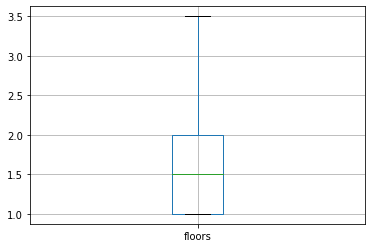

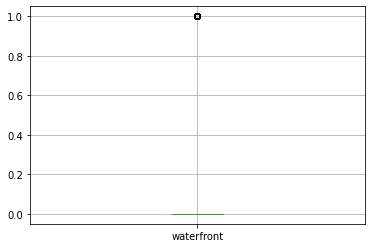

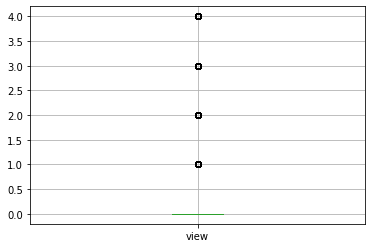

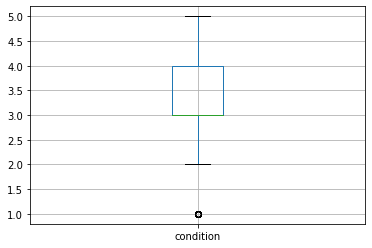

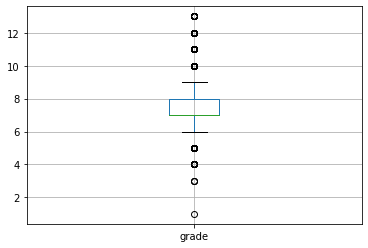

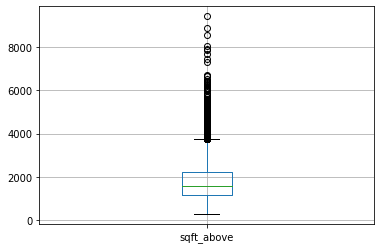

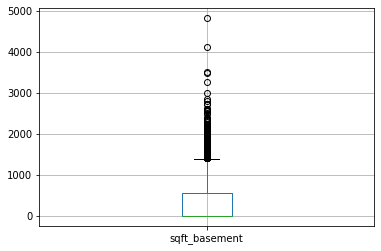

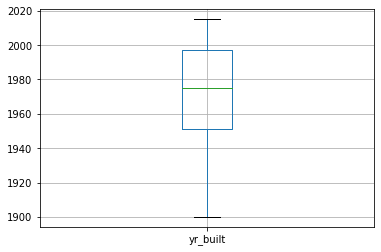

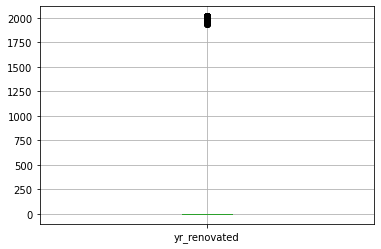

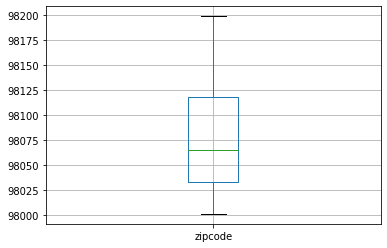

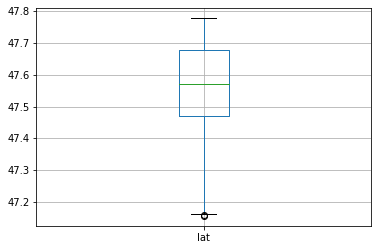

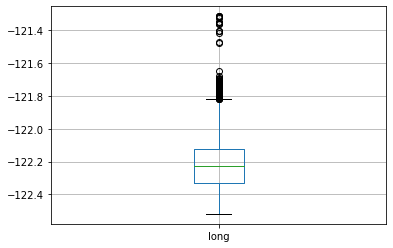

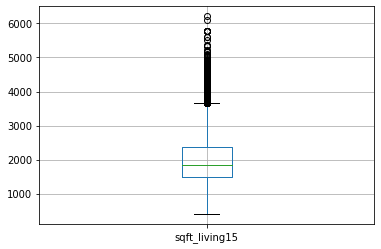

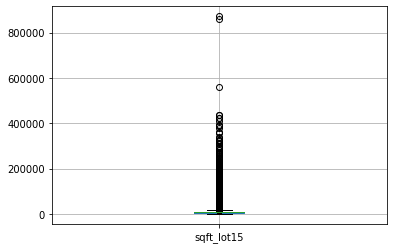

In [76]:
normalized_data=(data-data.min())/(data.max()-data.min())
for col in data.columns:
    pd.DataFrame(data[col]).boxplot()
    plt.show()


We want to know all the names of the columns

In [26]:
data.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

We saw in the Boxplots that there are a lot of outlier to get meaningful information
we try to filter out a given percentage of this outlier to determine if they have an impact on the
results

In [84]:
from sklearn.ensemble import IsolationForest
data_without_na = data.dropna()
display(data_without_na.shape)
X = data_without_na.drop('price', axis=1)
y = data_without_na['price']
data_without_outliers = {}
contaminations = [0.05, 0.1, 0.2]
for contamination in contaminations:
    iso = IsolationForest(contamination=0.05)
    y_out = iso.fit_predict(X)

    # build a mask to select all rows that are not outliers (inlier=1, outlier=-1)
    mask = y_out != 1
    X_outliers, y_outliers = X[mask], y[mask]

    # Inliers vs. Outliers
    print("Inliers: ",X.shape[0]-X_outliers.shape[0],"Outliers:",X_outliers.shape[0])

    # display(X_red)
    data_without_outliers[contamination] = data_without_na.drop(X_outliers.index)

(21613, 19)

/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


/Users/direnctimurprivat/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Inliers:  20532 Outliers: 1081


To answer the Question what properties did have the most influences on the price
we take the correlation between the columns and the price (with and without outlier)
and display them as Bar graphs

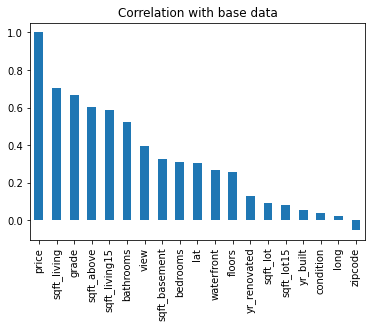

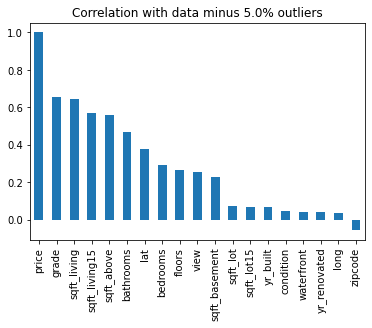

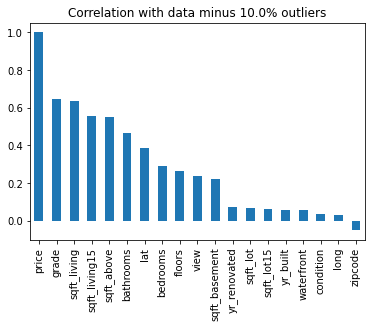

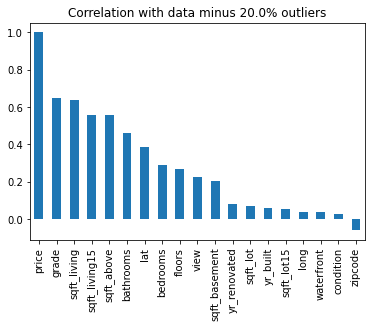

In [85]:
import matplotlib.pyplot as plt

price_corr = data.corr()["price"].sort_values(ascending=False)
price_corr.plot(kind="bar", title="Correlation with base data")
plt.show()
for contamination in contaminations:
    price_corr = data_without_outliers[contamination].corr()["price"].sort_values(ascending=False)
    price_corr.plot(kind="bar", title=f"Correlation with data minus {contamination*100}% outliers")
    plt.show()

We see in all Graphs that the Top 4 influences are: grade, sqrft_living, sqrft_living15 and sqrft_above

